In [140]:
#Instead of 4 classes - we have 10 classes.

#Plotting scatterplot matrix for the 10 files clips downloaded from the internet
#Each clip is 2s long

#Uses most recently updated scatterplot matrix code
#From Scatterplot_Experiments_till_5_Modified and Scatterplot_Experiments_till_5_pt_1

#Also uses code for 10 files from ACI_check

#fname_list = ["Airplane_Sound", "Heavy_rain", "Brown_Noise", "Pink_Noise", "White_Noise", 
#"Rufous_Antpitta", "Grey_headed_woodpecker", "Italian_Sparrow", "Hawk_scream", "Dove"]

#For each file, we will return - 
#(1) from calls_orig - an array for each Acoustic Index with as many elements as the number of spectrograms extracted from it
#(num_specs will be set accordingly)
#(2) from calls - 4 arrays - one for each channel - and 5 for each index (so 20). No. of elements according to num_specs


In [141]:
#imports
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import hilbert
from scipy.signal import stft
import librosa
import os

#for scatter matrix
import pandas as pd
from pandas.plotting import scatter_matrix

#setting eps value for converting spec to log
eps = 1e-10

#function definitions for acoustic indices begin here

In [142]:
#imports for Acoustic indices functions
from ipynb.fs.full.AcousticInd import compute_aci
from ipynb.fs.full.AcousticInd import compute_adi
from ipynb.fs.full.AcousticInd import get_start_stop_indices
from ipynb.fs.full.AcousticInd import compute_adi_even
from ipynb.fs.full.AcousticInd import compute_sh
from ipynb.fs.full.AcousticInd import compute_ndsi

In [143]:
#function to load spectrograms and display dimensions (optional)
def load_display_dimensions(class_name, str_file, dim=0):

    #   description of data files
    #   spec_data is like a dict with fields
    #   'specs' (contains the mel-filtered spectrograms, in linear scale, as [num_specs, num_rows, num_cols])
    #   'spec_f' (contains the frequency axis points as a 1D array)
    #   'spec_t' (contains the time axis points as a 1D array)   
    
    fname_load = class_name + str_file
    spec_data = np.load(fname_load)
    
    time_steps = len(spec_data['spec_t'])
    freq_bins = len(spec_data['spec_f'])
    
    dim=0
    
    if (dim==1):
        print('File has %i specs of dimensions (%i x %i)' % (
        spec_data['specs'].shape[0], spec_data['specs'].shape[1], spec_data['specs'].shape[2]))
        print('Frequency axis points are in spec_data[\'spec_f\'] and has %i values' % freq_bins)
        print('Time axis points are in spec_data[\'spec_t\'] and has %i values' % time_steps)
        
    return spec_data, time_steps, freq_bins
    


In [144]:
#function to calculate all acoustic indices and plot spectrogram (optional)
def calc_plot(num_bins, spec_start_idx, num_specs, spec_data, ch, time_steps, freq_bins, freq_vals, start_freq_idx, stop_freq_idx, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot=0):
    
    ACI = np.zeros((num_specs, 1))
    ADI = np.zeros((num_specs, 1))
    ADI_even = np.zeros((num_specs, 1))
    SH = np.zeros((num_specs, 1))
    NDSI = np.zeros((num_specs, 1))
           
    #Store log version of all spectrograms in all_specs
    #all_specs = 10 * np.log10(spec_data['specs'][spec_start_idx:spec_start_idx+num_specs, :, :] + eps)
    
    if(ch==-1):
        #Original spectrogram
        all_specs = 10 * np.log10(spec_data['specs'][spec_start_idx:spec_start_idx+num_specs, :, :] + eps)
    else:
        #4 differential channels so 1 dimension extra at the end for which channel
        all_specs = spec_data['specs'][spec_start_idx:spec_start_idx+num_specs, :, :, ch] 

    #print(spec_data['specs'].shape)

    #Vectorized implementations 
    ACI = compute_aci(all_specs, time_steps, freq_bins, num_specs)
    ADI = compute_adi(all_specs, time_steps)
    ADI_even = compute_adi_even(num_bins, all_specs, freq_vals, start_freq_idx, stop_freq_idx)
    SH = compute_sh(all_specs, time_steps, freq_bins)
    NDSI = compute_ndsi(all_specs, start_freq_idx, stop_freq_idx, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq)
           
    return ACI, ADI, ADI_even, SH, NDSI


In [145]:
#calls all functions for each class - is for the original data
def calls_orig(class_name, spec_start_idx, multiples, num_bins, dim, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot=0):

    #Load the correct file
    str_file = '_spec.npz'
    spec_data, time_steps, freq_bins = load_display_dimensions(class_name, str_file, dim)
    
    #num_specs
    num_specs = spec_data['specs'].shape[0]
    print("Num specs is", num_specs)
    
    #Calling helper function for compute_adi_even
    start_freq_idx, stop_freq_idx = get_start_stop_indices(spec_data['spec_f'], multiples, num_bins)
    
    #Computing acoustic indices for all 4 channels
    ch = -1
    ACI, ADI, ADI_even, SH, NDSI = calc_plot(num_bins, spec_start_idx, num_specs, spec_data, ch, time_steps, freq_bins, spec_data['spec_f'], start_freq_idx, stop_freq_idx, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)
    
    return num_specs, ACI, ADI, ADI_even, SH, NDSI

In [146]:
#calls all functions for each class
def calls(class_name, spec_start_idx, multiples, num_bins, dim, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot=0):

    #Load the correct file
    str_file = '_melspec_dd.npz'
    spec_data, time_steps, freq_bins = load_display_dimensions(class_name, str_file, dim)
        
    #num_specs
    num_specs = spec_data['specs'].shape[0]
    
    #Calling helper function for compute_adi_even
    start_freq_idx, stop_freq_idx = get_start_stop_indices(spec_data['spec_f'], multiples, num_bins)

    #Computing acoustic indices for all 4 channels
    ACI1, ADI1, ADI_even1, SH1, NDSI1 = calc_plot(num_bins, spec_start_idx, num_specs, spec_data, 0, time_steps, freq_bins, spec_data['spec_f'], start_freq_idx, stop_freq_idx, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)
    ACI2, ADI2, ADI_even2, SH2, NDSI2 = calc_plot(num_bins, spec_start_idx, num_specs, spec_data, 1, time_steps, freq_bins, spec_data['spec_f'], start_freq_idx, stop_freq_idx, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)
    ACI3, ADI3, ADI_even3, SH3, NDSI3 = calc_plot(num_bins, spec_start_idx, num_specs, spec_data, 2, time_steps, freq_bins, spec_data['spec_f'], start_freq_idx, stop_freq_idx, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)
    ACI4, ADI4, ADI_even4, SH4, NDSI4 = calc_plot(num_bins, spec_start_idx, num_specs, spec_data, 3, time_steps, freq_bins, spec_data['spec_f'], start_freq_idx, stop_freq_idx, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)

    return ACI1, ADI1, ADI_even1, SH1, NDSI1, ACI2, ADI2, ADI_even2, SH2, NDSI2, ACI3, ADI3, ADI_even3, SH3, NDSI3, ACI4, ADI4, ADI_even4, SH4, NDSI4
       

In [147]:
fname_list = ["Airplane_Sound", "Heavy_rain", "Brown_Noise", "Pink_Noise", "White_Noise", "Rufous_Antpitta", "Grey_headed_woodpecker", "Italian_Sparrow", "Hawk_scream", "Dove"]


In [148]:
#Main
  
#Make sure the indices don't get larger than spec_data['specs'].shape[0]
spec_start_idx = 0
#Other parameters
plot = 0
dim = 1
num_bins = 8            #for compute_adi_even, NDSI
multiples = 1000

#NDSI bin frequencies in kHz - a = anthrophony, b = biophony
#Values set according to the original paper
start_a_freq = 1
stop_a_freq = 2
start_b_freq = 2
stop_b_freq = 8


In [149]:
#Calls

#File1
#Call for original spectrogram
numspecs1, ACI1, ADI1, ADI_even1, SH1, NDSI1 = calls_orig(fname_list[0], spec_start_idx, multiples, num_bins, dim, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)  
#Calls for each channel
ACI_1_1, ADI_1_1, ADI_even_1_1, SH_1_1, NDSI_1_1, ACI_1_2, ADI_1_2, ADI_even_1_2, SH_1_2, NDSI_1_2, ACI_1_3, ADI_1_3, ADI_even_1_3, SH_1_3, NDSI_1_3, ACI_1_4, ADI_1_4, ADI_even_1_4, SH_1_4, NDSI_1_4 = calls(fname_list[0], spec_start_idx, multiples, num_bins, dim, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)
    
#File2
#Call for original spectrogram
numspecs2, ACI2, ADI2, ADI_even2, SH2, NDSI2 = calls_orig(fname_list[1], spec_start_idx, multiples, num_bins, dim, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)  
#Calls for each channel
ACI_2_1, ADI_2_1, ADI_even_2_1, SH_2_1, NDSI_2_1, ACI_2_2, ADI_2_2, ADI_even_2_2, SH_2_2, NDSI_2_2, ACI_2_3, ADI_2_3, ADI_even_2_3, SH_2_3, NDSI_2_3, ACI_2_4, ADI_2_4, ADI_even_2_4, SH_2_4, NDSI_2_4 = calls(fname_list[1], spec_start_idx, multiples, num_bins, dim, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)
   
#File3
#Call for original spectrogram
numspecs3, ACI3, ADI3, ADI_even3, SH3, NDSI3 = calls_orig(fname_list[2], spec_start_idx, multiples, num_bins, dim, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)  
#Calls for each channel
ACI_3_1, ADI_3_1, ADI_even_3_1, SH_3_1, NDSI_3_1, ACI_3_2, ADI_3_2, ADI_even_3_2, SH_3_2, NDSI_3_2, ACI_3_3, ADI_3_3, ADI_even_3_3, SH_3_3, NDSI_3_3, ACI_3_4, ADI_3_4, ADI_even_3_4, SH_3_4, NDSI_3_4 = calls(fname_list[2], spec_start_idx, multiples, num_bins, dim, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)
   
#File4
#Call for original spectrogram
numspecs4, ACI4, ADI4, ADI_even4, SH4, NDSI4 = calls_orig(fname_list[3], spec_start_idx, multiples, num_bins, dim, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)  
#Calls for each channel
ACI_4_1, ADI_4_1, ADI_even_4_1, SH_4_1, NDSI_4_1, ACI_4_2, ADI_4_2, ADI_even_4_2, SH_4_2, NDSI_4_2, ACI_4_3, ADI_4_3, ADI_even_4_3, SH_4_3, NDSI_4_3, ACI_4_4, ADI_4_4, ADI_even_4_4, SH_4_4, NDSI_4_4 = calls(fname_list[3], spec_start_idx, multiples, num_bins, dim, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)
   
#File5
#Call for original spectrogram
numspecs5, ACI5, ADI5, ADI_even5, SH5, NDSI5 = calls_orig(fname_list[4], spec_start_idx, multiples, num_bins, dim, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)  
#Calls for each channel
ACI_5_1, ADI_5_1, ADI_even_5_1, SH_5_1, NDSI_5_1, ACI_5_2, ADI_5_2, ADI_even_5_2, SH_5_2, NDSI_5_2, ACI_5_3, ADI_5_3, ADI_even_5_3, SH_5_3, NDSI_5_3, ACI_5_4, ADI_5_4, ADI_even_5_4, SH_5_4, NDSI_5_4 = calls(fname_list[4], spec_start_idx, multiples, num_bins, dim, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)
   
#File6
#Call for original spectrogram
numspecs6, ACI6, ADI6, ADI_even6, SH6, NDSI6 = calls_orig(fname_list[5], spec_start_idx, multiples, num_bins, dim, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)  
#Calls for each channel
ACI_6_1, ADI_6_1, ADI_even_6_1, SH_6_1, NDSI_6_1, ACI_6_2, ADI_6_2, ADI_even_6_2, SH_6_2, NDSI_6_2, ACI_6_3, ADI_6_3, ADI_even_6_3, SH_6_3, NDSI_6_3, ACI_6_4, ADI_6_4, ADI_even_6_4, SH_6_4, NDSI_6_4 = calls(fname_list[5], spec_start_idx, multiples, num_bins, dim, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)
   
#File7
#Call for original spectrogram
numspecs7, ACI7, ADI7, ADI_even7, SH7, NDSI7 = calls_orig(fname_list[6], spec_start_idx, multiples, num_bins, dim, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)  
#Calls for each channel
ACI_7_1, ADI_7_1, ADI_even_7_1, SH_7_1, NDSI_7_1, ACI_7_2, ADI_7_2, ADI_even_7_2, SH_7_2, NDSI_7_2, ACI_7_3, ADI_7_3, ADI_even_7_3, SH_7_3, NDSI_7_3, ACI_7_4, ADI_7_4, ADI_even_7_4, SH_7_4, NDSI_7_4 = calls(fname_list[6], spec_start_idx, multiples, num_bins, dim, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)
   
#File8
#Call for original spectrogram
numspecs8, ACI8, ADI8, ADI_even8, SH8, NDSI8 = calls_orig(fname_list[7], spec_start_idx, multiples, num_bins, dim, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)  
#Calls for each channel
ACI_8_1, ADI_8_1, ADI_even_8_1, SH_8_1, NDSI_8_1, ACI_8_2, ADI_8_2, ADI_even_8_2, SH_8_2, NDSI_8_2, ACI_8_3, ADI_8_3, ADI_even_8_3, SH_8_3, NDSI_8_3, ACI_8_4, ADI_8_4, ADI_even_8_4, SH_8_4, NDSI_8_4 = calls(fname_list[7], spec_start_idx, multiples, num_bins, dim, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)
   
#File9
#Call for original spectrogram
numspecs9, ACI9, ADI9, ADI_even9, SH9, NDSI9 = calls_orig(fname_list[8], spec_start_idx, multiples, num_bins, dim, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)  
#Calls for each channel
ACI_9_1, ADI_9_1, ADI_even_9_1, SH_9_1, NDSI_9_1, ACI_9_2, ADI_9_2, ADI_even_9_2, SH_9_2, NDSI_9_2, ACI_9_3, ADI_9_3, ADI_even_9_3, SH_9_3, NDSI_9_3, ACI_9_4, ADI_9_4, ADI_even_9_4, SH_9_4, NDSI_9_4 = calls(fname_list[8], spec_start_idx, multiples, num_bins, dim, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)
   
#File10
#Call for original spectrogram
numspecs10, ACI10, ADI10, ADI_even10, SH10, NDSI10 = calls_orig(fname_list[9], spec_start_idx, multiples, num_bins, dim, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)  
#Calls for each channel
ACI_10_1, ADI_10_1, ADI_even_10_1, SH_10_1, NDSI_10_1, ACI_10_2, ADI_10_2, ADI_even_10_2, SH_10_2, NDSI_10_2, ACI_10_3, ADI_10_3, ADI_even_10_3, SH_10_3, NDSI_10_3, ACI_10_4, ADI_10_4, ADI_even_10_4, SH_10_4, NDSI_10_4 = calls(fname_list[9], spec_start_idx, multiples, num_bins, dim, start_a_freq, stop_a_freq, start_b_freq, stop_b_freq, plot)
   

Num specs is 2
Num specs is 2
Num specs is 2
Num specs is 2
Num specs is 2
Num specs is 2
Num specs is 2
Num specs is 2
Num specs is 2
Num specs is 3


In [150]:
#Seaborn for visualizations
import seaborn as sns
sns.set(style="ticks")

In [151]:
#General procedure to get pandas dataframes: 
#(1)reshape the array
#(2) create a dataframe with columns as acoustic indices
#(3) add an extra column with class name

def convert_df(ind1, ind2, ind3, ind4, ind5, num_specs, class_type, ch):
    ind1 = np.reshape(ind1, (num_specs, ))
    ind2 = np.reshape(ind2, (num_specs, ))
    ind3 = np.reshape(ind3, (num_specs, ))
    ind4 = np.reshape(ind4, (num_specs, ))
    ind5 = np.reshape(ind5, (num_specs, ))
    
    Class = class_type

    data = pd.DataFrame({'ACI': ind1, 'ADI': ind2, 'ADI_even': ind3, 'SH': ind4,'NDSI': ind5, 'Class': Class}, columns=['ACI', 'ADI', 'ADI_even', 'SH', 'NDSI', 'Class'])
    #print(data.shape)
    #data.head()
    
    #renaming the columns of the dataframe 'data' to be used while combining not NaN rows later
    if(ch!=-1 and ch!=5):
        data.rename(columns={'ACI': 'ACI'+str(ch), 'ADI': 'ADI'+str(ch), 'ADI_even': 'ADI_even'+str(ch), 'SH': 'SH'+str(ch), 'NDSI': 'NDSI'+str(ch), 'Class': 'Class'+str(ch)}, inplace=True)
 
    return data

In [165]:
def get_df_and_plot(ch, ACI1, ADI1, ADI_even1, SH1, NDSI1, num_specs1, ACI2, ADI2, ADI_even2, SH2, NDSI2, num_specs2, ACI3, ADI3, ADI_even3, SH3, NDSI3, num_specs3, ACI4, ADI4, ADI_even4, SH4, NDSI4, num_specs4, ACI5, ADI5, ADI_even5, SH5, NDSI5, num_specs5, ACI6, ADI6, ADI_even6, SH6, NDSI6, num_specs6, ACI7, ADI7, ADI_even7, SH7, NDSI7, num_specs7, ACI8, ADI8, ADI_even8, SH8, NDSI8, num_specs8, ACI9, ADI9, ADI_even9, SH9, NDSI9, num_specs9, ACI10, ADI10, ADI_even10, SH10, NDSI10, num_specs10):


    #Converting to dataframes 
    data_1_orig = convert_df(ACI1, ADI1, ADI_even1, SH1, NDSI1, num_specs1, 'one', ch)
    data_2_orig = convert_df(ACI2, ADI2, ADI_even2, SH2, NDSI2, num_specs2, 'two', ch)
    data_3_orig = convert_df(ACI3, ADI3, ADI_even3, SH3, NDSI3, num_specs3, 'three', ch)
    data_4_orig = convert_df(ACI4, ADI4, ADI_even4, SH4, NDSI4, num_specs4, 'four', ch)
    data_5_orig = convert_df(ACI5, ADI5, ADI_even5, SH5, NDSI5, num_specs5, 'five', ch)
    data_6_orig = convert_df(ACI6, ADI6, ADI_even6, SH6, NDSI6, num_specs6, 'six', ch)
    data_7_orig = convert_df(ACI7, ADI7, ADI_even7, SH7, NDSI7, num_specs7, 'seven', ch)
    data_8_orig = convert_df(ACI8, ADI8, ADI_even8, SH8, NDSI8, num_specs8, 'eight', ch)
    data_9_orig = convert_df(ACI9, ADI9, ADI_even9, SH9, NDSI9, num_specs9, 'nine', ch)
    data_10_orig = convert_df(ACI10, ADI10, ADI_even10, SH10, NDSI10, num_specs10, 'ten', ch)

    #Scatterplot matrix for all 4 classes
    all_data_arr = [data_1_orig, data_2_orig, data_3_orig, data_4_orig, data_5_orig, data_6_orig, data_7_orig, data_8_orig, data_9_orig, data_10_orig]
    all_data_df = pd.concat(all_data_arr)

    print(all_data_df.shape)
    #all_data_df.head()
    
    if(ch!=-1 and ch!=5):
        Hue = 'Class' + str(ch)
    else:
        Hue = 'Class'
    
    sns.pairplot(all_data_df, hue=Hue)
    plt.show()
    
    return all_data_df
    

(21, 6)


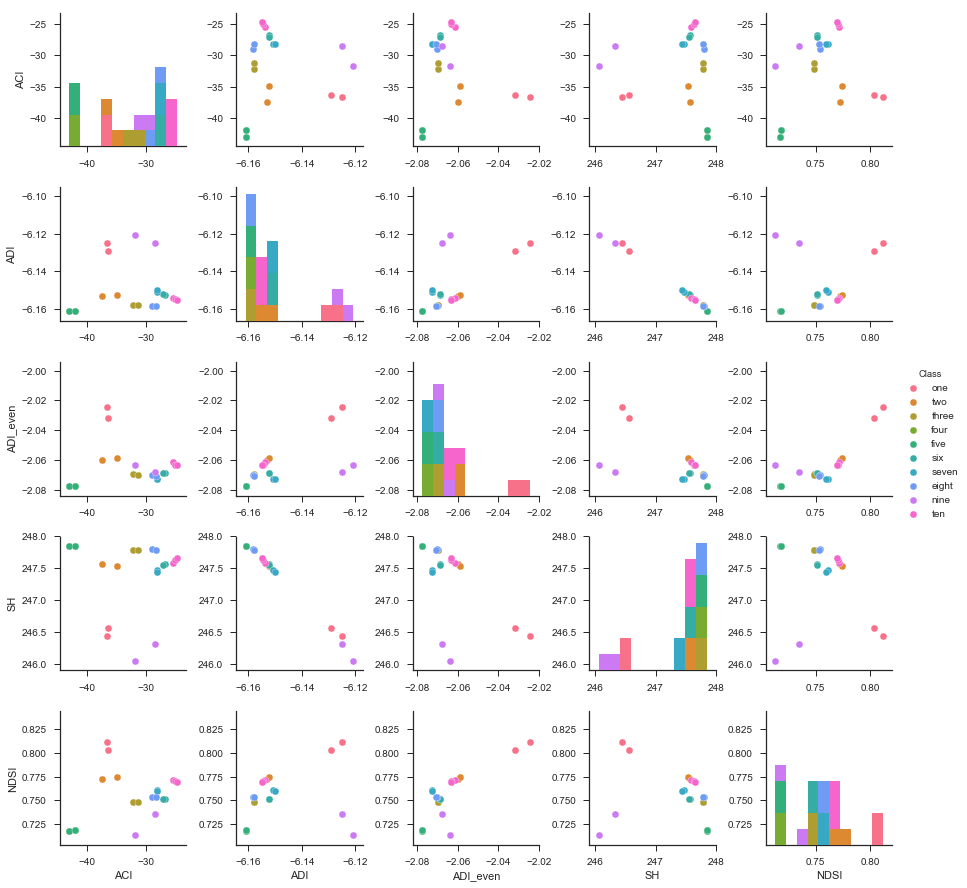

,ACI,ADI,ADI_even,SH,NDSI,Class
0,-36.559998,-6.125021,-2.024370,246.437149,0.811703,one
1,-36.376534,-6.129028,-2.031589,246.566406,0.803028,one
0,-37.423836,-6.153160,-2.059835,247.567383,0.772150,two
1,-34.929825,-6.152201,-2.058829,247.538956,0.774205,two
0,-32.157761,-6.157793,-2.069743,247.782593,0.748392,three


In [167]:
all_data_df_orig = get_df_and_plot(-1, ACI1, ADI1, ADI_even1, SH1, NDSI1, numspecs1, ACI2, ADI2, ADI_even2, SH2, NDSI2, numspecs2, ACI3, ADI3, ADI_even3, SH3, NDSI3, numspecs3, ACI4, ADI4, ADI_even4, SH4, NDSI4, numspecs4, ACI5, ADI5, ADI_even5, SH5, NDSI5, numspecs5, ACI6, ADI6, ADI_even6, SH6, NDSI6, numspecs6, ACI7, ADI7, ADI_even7, SH7, NDSI7, numspecs7, ACI8, ADI8, ADI_even8, SH8, NDSI8, numspecs8, ACI9, ADI9, ADI_even9, SH9, NDSI9, numspecs9, ACI10, ADI10, ADI_even10, SH10, NDSI10, numspecs10)

all_data_df_orig.head()

(21, 6)


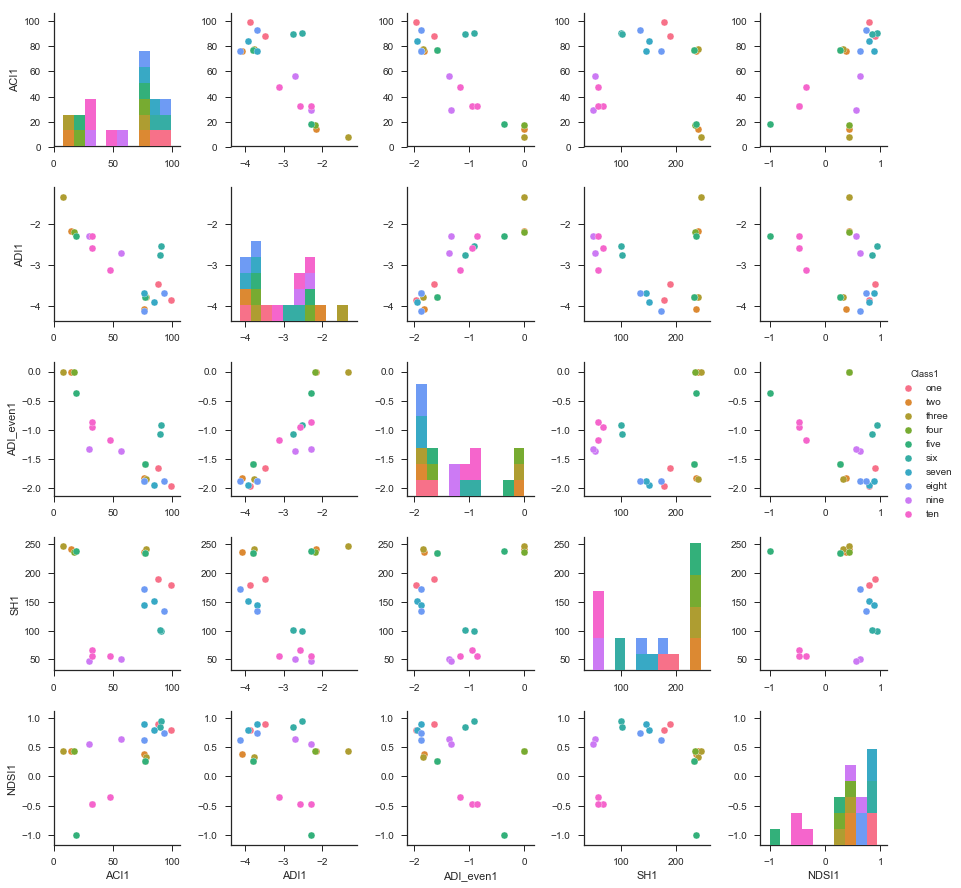

,ACI1,ADI1,ADI_even1,SH1,NDSI1,Class1
0,88.231857,-3.478766,-1.646766,190.057037,0.898954,one
1,99.043335,-3.867630,-1.959397,179.338684,0.790057,one
0,75.955475,-4.086088,-1.819815,236.754089,0.385265,two
1,14.188995,-2.172206,-0.000001,242.005936,0.435897,two
0,78.098717,-3.778977,-1.846585,241.591812,0.326903,three


In [168]:
all_data_df1 = get_df_and_plot(1, ACI_1_1, ADI_1_1, ADI_even_1_1, SH_1_1, NDSI_1_1, numspecs1, ACI_2_1, ADI_2_1, ADI_even_2_1, SH_2_1, NDSI_2_1, numspecs2, ACI_3_1, ADI_3_1, ADI_even_3_1, SH_3_1, NDSI_3_1, numspecs3, ACI_4_1, ADI_4_1, ADI_even_4_1, SH_4_1, NDSI_4_1, numspecs4, ACI_5_1, ADI_5_1, ADI_even_5_1, SH_5_1, NDSI_5_1, numspecs5, ACI_6_1, ADI_6_1, ADI_even_6_1, SH_6_1, NDSI_6_1, numspecs6, ACI_7_1, ADI_7_1, ADI_even_7_1, SH_7_1, NDSI_7_1, numspecs7, ACI_8_1, ADI_8_1, ADI_even_8_1, SH_8_1, NDSI_8_1, numspecs8, ACI_9_1, ADI_9_1, ADI_even_9_1, SH_9_1, NDSI_9_1, numspecs9, ACI_10_1, ADI_10_1, ADI_even_10_1, SH_10_1, NDSI_10_1, numspecs10)

all_data_df1.head()

(21, 6)


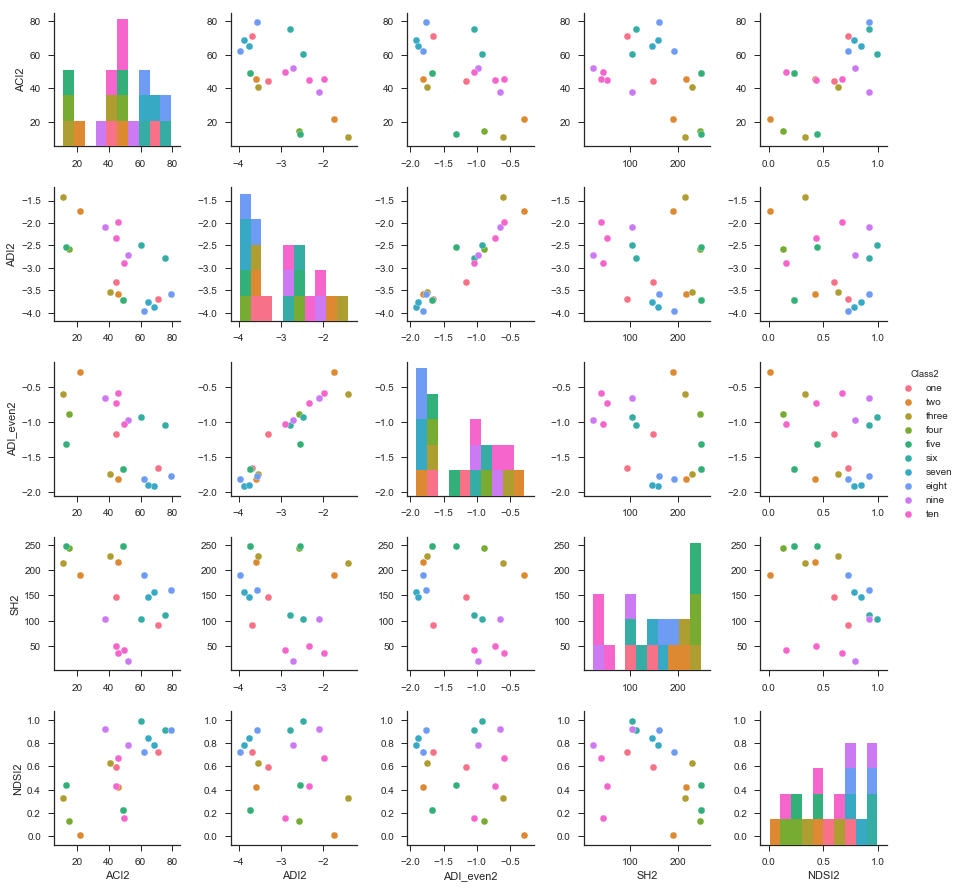

In [169]:
all_data_df2 = get_df_and_plot(2, ACI_1_2, ADI_1_2, ADI_even_1_2, SH_1_2, NDSI_1_2, numspecs1, ACI_2_2, ADI_2_2, ADI_even_2_2, SH_2_2, NDSI_2_2, numspecs2, ACI_3_2, ADI_3_2, ADI_even_3_2, SH_3_2, NDSI_3_2, numspecs3, ACI_4_2, ADI_4_2, ADI_even_4_2, SH_4_2, NDSI_4_2, numspecs4, ACI_5_2, ADI_5_2, ADI_even_5_2, SH_5_2, NDSI_5_2, numspecs5, ACI_6_2, ADI_6_2, ADI_even_6_2, SH_6_2, NDSI_6_2, numspecs6, ACI_7_2, ADI_7_2, ADI_even_7_2, SH_7_2, NDSI_7_2, numspecs7, ACI_8_2, ADI_8_2, ADI_even_8_2, SH_8_2, NDSI_8_2, numspecs8, ACI_9_2, ADI_9_2, ADI_even_9_2, SH_9_2, NDSI_9_2, numspecs9, ACI_10_2, ADI_10_2, ADI_even_10_2, SH_10_2, NDSI_10_2, numspecs10)


(21, 6)


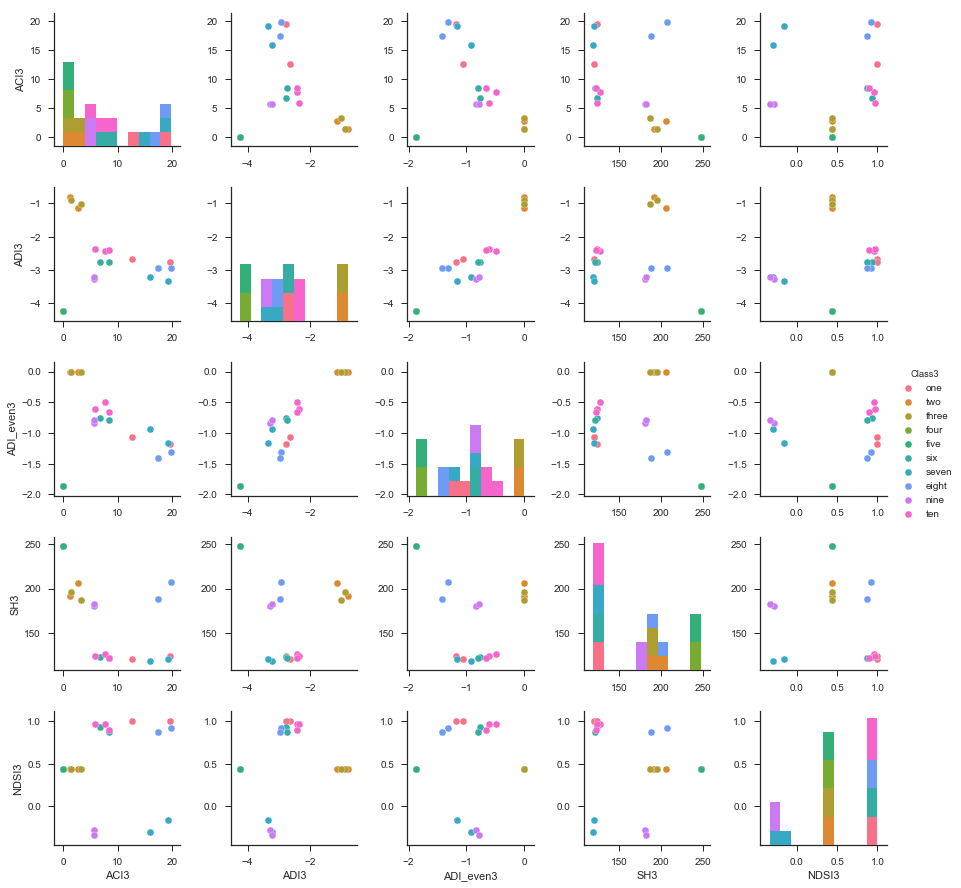

In [170]:
all_data_df3 = get_df_and_plot(3, ACI_1_3, ADI_1_3, ADI_even_1_3, SH_1_3, NDSI_1_3, numspecs1, ACI_2_3, ADI_2_3, ADI_even_2_3, SH_2_3, NDSI_2_3, numspecs2, ACI_3_3, ADI_3_3, ADI_even_3_3, SH_3_3, NDSI_3_3, numspecs3, ACI_4_3, ADI_4_3, ADI_even_4_3, SH_4_3, NDSI_4_3, numspecs4, ACI_5_3, ADI_5_3, ADI_even_5_3, SH_5_3, NDSI_5_3, numspecs5, ACI_6_3, ADI_6_3, ADI_even_6_3, SH_6_3, NDSI_6_3, numspecs6, ACI_7_3, ADI_7_3, ADI_even_7_3, SH_7_3, NDSI_7_3, numspecs7, ACI_8_3, ADI_8_3, ADI_even_8_3, SH_8_3, NDSI_8_3, numspecs8, ACI_9_3, ADI_9_3, ADI_even_9_3, SH_9_3, NDSI_9_3, numspecs9, ACI_10_3, ADI_10_3, ADI_even_10_3, SH_10_3, NDSI_10_3, numspecs10)


(21, 6)


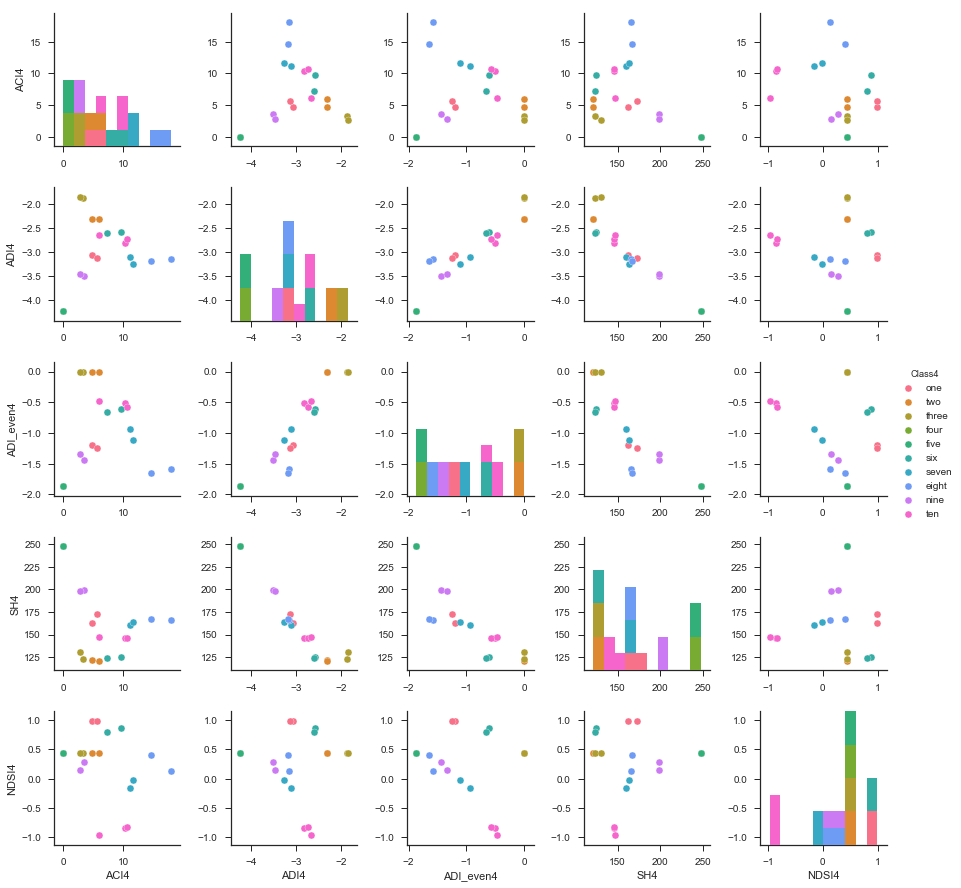

In [171]:
all_data_df4 = get_df_and_plot(4, ACI_1_4, ADI_1_4, ADI_even_1_4, SH_1_4, NDSI_1_4, numspecs1, ACI_2_4, ADI_2_4, ADI_even_2_4, SH_2_4, NDSI_2_4, numspecs2, ACI_3_4, ADI_3_4, ADI_even_3_4, SH_3_4, NDSI_3_4, numspecs3, ACI_4_4, ADI_4_4, ADI_even_4_4, SH_4_4, NDSI_4_4, numspecs4, ACI_5_4, ADI_5_4, ADI_even_5_4, SH_5_4, NDSI_5_4, numspecs5, ACI_6_4, ADI_6_4, ADI_even_6_4, SH_6_4, NDSI_6_4, numspecs6, ACI_7_4, ADI_7_4, ADI_even_7_4, SH_7_4, NDSI_7_4, numspecs7, ACI_8_4, ADI_8_4, ADI_even_8_4, SH_8_4, NDSI_8_4, numspecs8, ACI_9_4, ADI_9_4, ADI_even_9_4, SH_9_4, NDSI_9_4, numspecs9, ACI_10_4, ADI_10_4, ADI_even_10_4, SH_10_4, NDSI_10_4, numspecs10)
